#Actividad 5 Módulo 5

#Ejercicios planteados

El objetivo del ejercicio actual es utilizar medidas físicas para predecir la edad del abulón, usando el algoritmo K-NN

Datos:

In [146]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd

url = (
"https://archive.ics.uci.edu/ml/machine-learning-databases"
"/abalone/abalone.data"
)
abalone = pd.read_csv(url, header=None)
abalone.columns = [
"Sex",
"Length",
"Diameter",
"Height",
"Whole weight",
"Shucked weight",
"Viscera weight",
"Shell weight",
"Rings",
]
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [147]:
abalone.shape

(4177, 9)

1. Lo primero que debe hacer es eliminar la variable “Sex”.

In [148]:
abalone.drop("Sex", axis=1, inplace=True)

In [149]:
abalone.head(2)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


2. Realice estadística descriptiva para el conjunto de datos entregados.

In [150]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [151]:
rings_distribution = abalone.Rings.value_counts().sort_index()
print("Distribución de los Rings:")
print(rings_distribution)

Distribución de los Rings:
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64


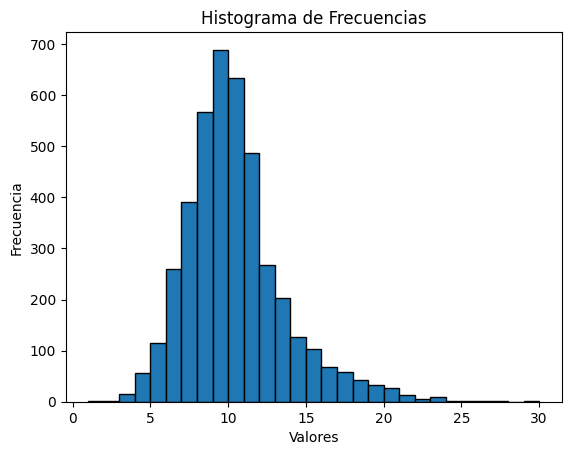

In [152]:
# Datos de ejemplo
import matplotlib.pyplot as plt

rings_distribution = abalone.Rings.values

# Crear el histograma
plt.hist(rings_distribution, bins=range(min(rings_distribution), max(rings_distribution) + 2), edgecolor='black')

# Configurar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencias')

# Mostrar el histograma
plt.show()

3. La variable objetivo es “Rings”, por lo que muestre la distribución de estos datos e interprete.

<Axes: xlabel='Rings', ylabel='Count'>

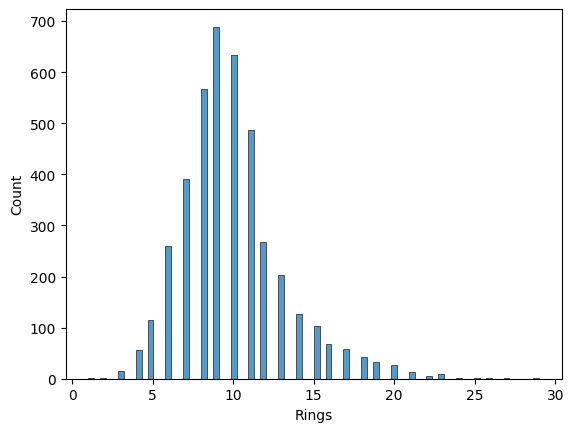

In [153]:
import seaborn as sns
sns.histplot(x='Rings', data=abalone)

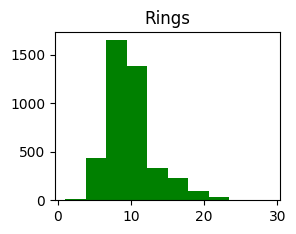

In [154]:
plt.subplot(2,2,1) 
plt.hist(abalone["Rings"], color = "green")
plt.title("Rings")
plt.show()

4. Entregue la matriz de correlación ¿Qué variables pueden estar
correlacionadas?

In [155]:
# correlación entre variables
abalone.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


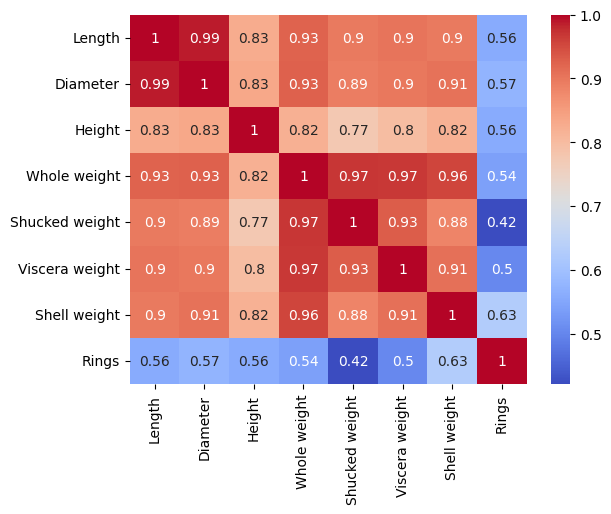

In [156]:
# Calcular la matriz de correlación
correlation_matrix = abalone.corr()

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.show()

Están correlacionadas: largo con diametro y distintos pesos. Rings es la variable menos correlacionada con las otras por ser la variable objetivo.

5. Defina las distancias en los vectores de las variables independientes.
Para esto puede usar el atributo .values de Numpy


In [157]:
# el ejercicio no proporciona un nuevo punto de datos para realizar la actividad por lo que
# se emplea arbitrariamente la media de las variables independientes como el nuevo punto o vecino
abalone.drop('Rings', axis=1).describe()[1:2].values

array([[0.5239921 , 0.40788125, 0.1395164 , 0.82874216, 0.35936749,
        0.18059361, 0.23883086]])

6. Guarde los datos en una matriz y úselo en este código:
distances = np.linalg.norm(X - new_data_point, axis=1)

In [158]:
import numpy as np
X = abalone.drop("Rings", axis=1).values
# Nuevo punto de datos en base a la media de las variables existentes
new_data_point = abalone.drop('Rings', axis=1).describe()[1:2].values
distances = np.linalg.norm(X - new_data_point, axis=1)

7. Determine cuáles son los tres vecinos más cercanos.

In [159]:
# se ordenan para identificar los vecinos cernanos
idx = np.argsort(distances)
# define vecinos cercanos
k = 3
print(f"Los índices de los 3 vecinos más cercanos son {idx[:k]}")
print(f"\nLas distancias a los vecinos son {distances[idx[:k]]}")
print(f"\nLas 3 vecinos más cercanos son :")
print(f"{abalone.iloc[idx[:k]]}")

Los índices de los 3 vecinos más cercanos son [2892 3833 1599]

Las distancias a los vecinos son [0.02107309 0.02858634 0.02917011]

Las 3 vecinos más cercanos son :
      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
2892   0.530     0.405    0.15        0.8315          0.3520           0.187   
3833   0.535     0.410    0.15        0.8105          0.3450           0.187   
1599   0.530     0.420    0.13        0.8365          0.3745           0.167   

      Shell weight  Rings  
2892        0.2525     10  
3833        0.2400     11  
1599        0.2490     11  


Comprobación procedimiento con el modelo clasificador KNN

In [160]:
# contrate con modelo KNN
# crear modelo clasificador KNN
knn = NearestNeighbors(n_neighbors=k)
# ajustar modelo
knn.fit(X)
# hallar los k vecinos cercanos al nuevo punto de datos arbitrario
dist, ind = knn.kneighbors(new_data_point)
print(f"Los índices de los 3 vecinos más cercanos son : {ind}")

Los índices de los 3 vecinos más cercanos son : [[2892 3833 1599]]
